In [33]:
!pip install pulp

In [34]:
##importing the libraries
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
print('\n')
print('Libraries imported')
print('\n')



Libraries imported




In [35]:
##importing the dataset
data = pd.read_excel("airplane movement.xlsx")
data[:5]

,Year,Aircraft movement,Passengers,Air cargo,Air Mail
0,2017,438578,43234161,826227,55623
1,2016,435907,40563293,746771,45798
2,2015,413878,37493540,705214,49029
3,2014,397361,35610687,666840,36380
4,2013,413742,35016236,663155,54677


In [36]:
data.dtypes

Year                 int64
Aircraft movement    int64
Passengers           int64
Air cargo            int64
Air Mail             int64
dtype: object

Text(0.5, 0, 'Aircraft Movement')

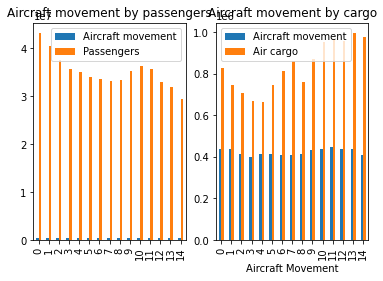

In [37]:
fig, axs = plt.subplots(1,2)
my_plot = data[['Aircraft movement', 'Passengers']].plot(kind='bar', title="Aircraft movement by passengers", ax=axs[0])
my_plot = data[['Aircraft movement', 'Air cargo']].plot(kind='bar', title="Aircraft movement by cargo", ax=axs[1])
my_plot.set_xlabel("Aircraft Movement")

In [0]:
LpSolverDefault.msg = 1

In [0]:
# create the LP object, set up as a minimization problem --> since we want to minimize the costs 
prob = pulp.LpProblem('AircraftMovement', LpMinimize)

In [40]:
decision_variables = []
for rownum, row in data.iterrows():
	variable = str('x' + str(rownum))
	variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
	decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))

Total number of decision_variables: 15


In [41]:
total_cost = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['Aircraft movement']*schedule
			total_cost += formula

prob += total_cost
print ("Optimization function: " + str(total_cost))

Optimization function: 438578*x0 + 435907*x1 + 435930*x10 + 445258*x11 + 436244*x12 + 437446*x13 + 406879*x14 + 413878*x2 + 397361*x3 + 413742*x4 + 414127*x5 + 410024*x6 + 409320*x7 + 411821*x8 + 434050*x9


In [0]:
aval_vacation_days = 10
total_vacation_days = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['Passengers']*schedule
			total_vacation_days += formula

prob += (total_vacation_days == aval_vacation_days)

In [43]:
print (prob)
prob.writeLP("GoingOnVacation.lp" )

AircraftMovement:
MINIMIZE
438578*x0 + 435907*x1 + 435930*x10 + 445258*x11 + 436244*x12 + 437446*x13 + 406879*x14 + 413878*x2 + 397361*x3 + 413742*x4 + 414127*x5 + 410024*x6 + 409320*x7 + 411821*x8 + 434050*x9 + 0
SUBJECT TO
_C1: 43234161 x0 + 40563293 x1 + 36367210 x10 + 35634708 x11 + 33079244 x12
 + 31893372 x13 + 29450514 x14 + 37493540 x2 + 35610687 x3 + 35016236 x4
 + 33984027 x5 + 33697492 x6 + 33194190 x7 + 33360123 x8 + 35360736 x9 = 10

VARIABLES
0 <= x0 <= 1 Integer
0 <= x1 <= 1 Integer
0 <= x10 <= 1 Integer
0 <= x11 <= 1 Integer
0 <= x12 <= 1 Integer
0 <= x13 <= 1 Integer
0 <= x14 <= 1 Integer
0 <= x2 <= 1 Integer
0 <= x3 <= 1 Integer
0 <= x4 <= 1 Integer
0 <= x5 <= 1 Integer
0 <= x6 <= 1 Integer
0 <= x7 <= 1 Integer
0 <= x8 <= 1 Integer
0 <= x9 <= 1 Integer



[x0, x1, x10, x11, x12, x13, x14, x2, x3, x4, x5, x6, x7, x8, x9]

In [44]:
optimization_result = prob.solve()

optimization_result == LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Infeasible
Optimal Solution to the problem:  0.10144246861924
Individual decision_variables: 
x0 = 2.3129858e-07
x1 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
x2 = 0.0
x3 = 0.0
x4 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0


In [45]:
variable_value = []
variable_name = []
for v in prob.variables():
	variable_name.append(v.name)
	variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
	value = re.findall(r'(\d+)', row['variable'])
	df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_index()

#append results
for rownum, row in data.iterrows():
	for results_rownum, results_row in df.iterrows():
		if rownum == results_row['variable']:
			data.loc[rownum, 'decision'] = results_row['value']
            
data[:5]

,Year,Aircraft movement,Passengers,Air cargo,Air Mail,decision
0,2017,438578,43234161,826227,55623,2.312986e-07
1,2016,435907,40563293,746771,45798,0.000000e+00
2,2015,413878,37493540,705214,49029,0.000000e+00
3,2014,397361,35610687,666840,36380,0.000000e+00
4,2013,413742,35016236,663155,54677,0.000000e+00


In [46]:
data[data['decision'] == 1]

,Year,Aircraft movement,Passengers,Air cargo,Air Mail,decision
